In [1]:
# Analyze Titanic Dataset and prepare a Machine Learning to predict the passenger survial
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
import seaborn as sns

In [2]:
# Ml Algorithms
'''
LogisticRegression
svm
Naive Bayes
K-Nearest 
decision
Random Forest
'''

'\nLogisticRegression\nsvm\nNaive Bayes\nK-Nearest \ndecision\nRandom Forest\n'

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
#Basic Information about the Datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum() #Name and Id are the useless

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
X =df[['Pclass','Age','Sex','SibSp','Parch','Fare']]
y= df['Survived']

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Sex     891 non-null    object 
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [11]:
# Handling Missing value in age
X["Age"] = X['Age'].fillna(X['Age'].mean())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1528\2531001281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"] = X['Age'].fillna(X['Age'].mean())


In [12]:
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,male,1,0,7.2500
1,1,38.0,female,1,0,71.2833
2,3,26.0,female,0,0,7.9250
3,1,35.0,female,1,0,53.1000
4,3,35.0,male,0,0,8.0500


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1528\1271238252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = encoder.fit_transform(X['Sex'])


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =1)

In [15]:
# Dictionary of model setup
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "k-NEAREST Neighbors": KNeighborsClassifier(),
    "Decision Tree Regression": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}


[[90 16]
 [20 53]]
[[96 10]
 [52 21]]
[[89 17]
 [26 47]]
[[88 18]
 [33 40]]
[[89 17]
 [29 44]]
[[95 11]
 [28 45]]
Summary of all the Datasets
                      Model  Accuracy  Precision    Recall        F1
0       Logistic Regression  0.798883   0.768116  0.726027  0.746479
1    Support Vector Machine  0.653631   0.677419  0.287671  0.403846
2               Naive Bayes  0.759777   0.734375  0.643836  0.686131
3       k-NEAREST Neighbors  0.715084   0.689655  0.547945  0.610687
4  Decision Tree Regression  0.743017   0.721311  0.602740  0.656716
5  Random Forest Classifier  0.782123   0.803571  0.616438  0.697674


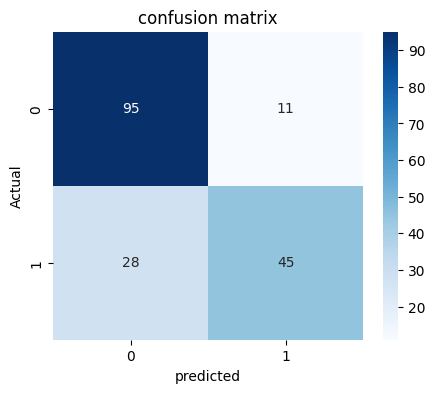

<Figure size 1200x800 with 0 Axes>

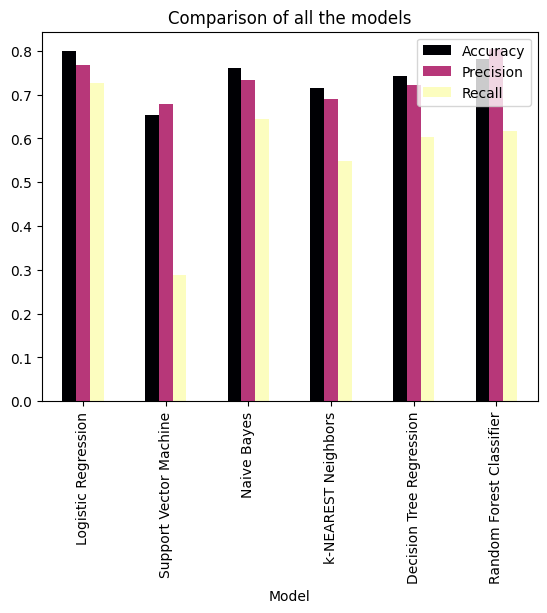

In [16]:
# Traning and Evaluating the model
results = []
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # classificationreport of all the ml agorithm
    
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    
    
    #performance parameters
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    results.append({
        'Model':name,
        'Accuracy':accuracy,
        'Precision':precision,
        'Recall':recall,
        'F1':f1
    })
    
    # summary of the model
    
    results_df = pd.DataFrame(results)
print("Summary of all the Datasets")
print(results_df)


#visualize the confusion matrix
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

#Visualize the comparison
plt.figure(figsize = (12,8))
results_df.set_index("Model")[['Accuracy','Precision','Recall',]].plot(kind ='bar',cmap = 'magma')
plt.title("Comparison of all the models")
plt.show()
    
    

In [17]:
best_model_name = results_df.sort_values(by="F1", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]


In [18]:
# Save the best model and encoder
import joblib
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(encoder, 'label_encoder.pkl')

['label_encoder.pkl']